In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
dataset_df = pd.read_csv('./out/cleaned_train.csv')

In [3]:
dataset_df

,DAY_OF_WEEK,HOUR_OF_DAY,MINUTE_OF_HOUR,SECOND_OF_MINUTE,TIME,BUS_ID,BUSROUTE_ID,BUSSTOP_ID,TIMESTAMP_DIFF
0,0,7,28,25,5305,0,3,17,117.0
1,0,7,30,22,5422,0,3,10,123.0
2,0,7,32,25,5545,0,3,8,121.0
3,0,7,34,26,5666,0,3,5,136.0
4,0,7,36,42,5802,0,3,3,174.0
...,...,...,...,...,...,...,...,...,...
3113890,4,21,47,30,56850,1076,8,109,74.0
3113891,4,21,48,44,56924,1076,8,117,123.0
3113892,4,21,50,47,57047,1076,8,119,91.0
3113893,4,21,52,18,57138,1076,8,121,82.0


In [4]:
train_df = dataset_df[['DAY_OF_WEEK', 'HOUR_OF_DAY', 'MINUTE_OF_HOUR', 'SECOND_OF_MINUTE', 'BUS_ID', 'BUSROUTE_ID', 'BUSSTOP_ID']]
label_df = dataset_df[['TIMESTAMP_DIFF']]

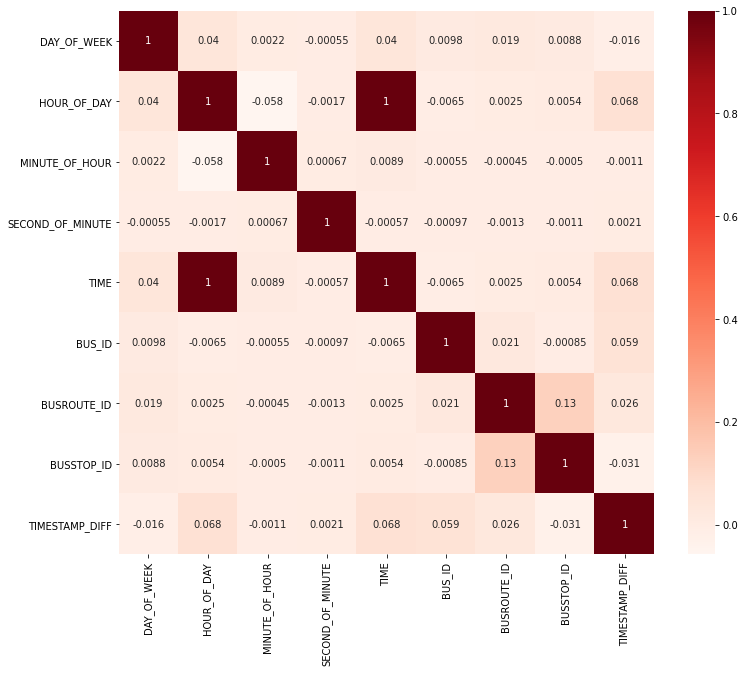

In [5]:
plt.figure(figsize=(12,10))
cor = dataset_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
cor_target = abs(cor["TIMESTAMP_DIFF"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

TIMESTAMP_DIFF    1.0
Name: TIMESTAMP_DIFF, dtype: float64

In [7]:
reg = LassoCV()
reg.fit(train_df, label_df)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(train_df, label_df))
coef = pd.Series(reg.coef_, index = train_df.columns)

/home/sharav/src/misc/data-nomads-phase-1-competition/env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 2.742096
Best score using built-in LassoCV: 0.010362


In [8]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

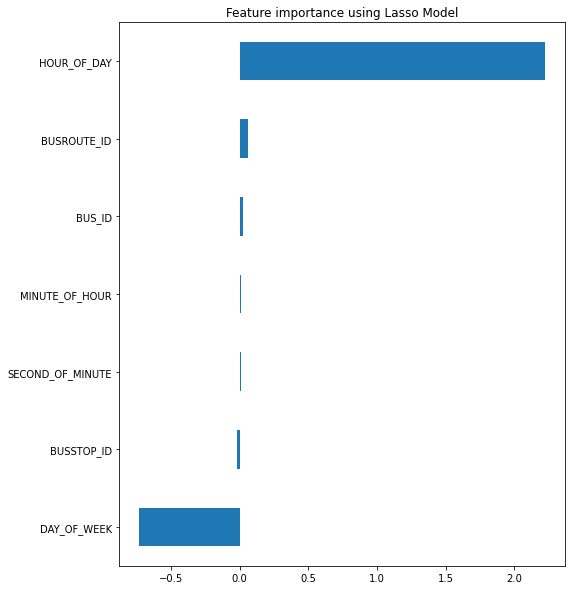

In [9]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")